In [1]:
import pandas as pd

In [2]:
github = 'https://raw.githubusercontent.com/martj42' 
df_allmatches = pd.read_csv(
f'{github}/international_results/master/results.csv')

In [11]:
df_allmatches[(df_allmatches.tournament=='FIFA World Cup')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1444,1930-07-13,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True
1445,1930-07-13,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True
1446,1930-07-14,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,True
1447,1930-07-14,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,True
1448,1930-07-15,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
45689,2022-12-10,England,France,1.0,2.0,FIFA World Cup,Al Khor,Qatar,True
45691,2022-12-13,Argentina,Croatia,3.0,0.0,FIFA World Cup,Lusail,Qatar,True
45692,2022-12-14,France,Morocco,2.0,0.0,FIFA World Cup,Al Khor,Qatar,True
45696,2022-12-17,Croatia,Morocco,2.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True


In [47]:
df_wc_22 = df_allmatches[(df_allmatches.tournament=='FIFA World Cup') & 
              (df_allmatches.date>='2022-11-20') & 
              (df_allmatches.date<='2022-12-02')]

df_eu_20 = df_allmatches[(df_allmatches.tournament=='UEFA Euro') & 
              (df_allmatches.date>='2021-06-11') & 
              (df_allmatches.date<='2021-06-23')]

df_wc_18 = df_allmatches[(df_allmatches.tournament=='FIFA World Cup') & 
              (df_allmatches.date>='2018-06-14') & 
              (df_allmatches.date<='2018-06-28')]

df_eu_16 = df_allmatches[(df_allmatches.tournament=='UEFA Euro') & 
              (df_allmatches.date>='2016-06-10') & 
              (df_allmatches.date<='2016-06-22')]


In [49]:
def add_matchday_goals(df_group):
    
    matchday_len = int(len(df_group)/3)
    print(matchday_len)
    df_group['matchday'] = 0
    df_group['matchday'][0:matchday_len] = 1
    df_group['matchday'][matchday_len:2*matchday_len] = 2
    df_group['matchday'][2*matchday_len:3*matchday_len] = 3

    df_group['tot_goals'] = \
    df_group['away_score'] + \
    df_group['home_score']
    
    return df_group

In [84]:
import random
import matplotlib.pyplot as plt

def plot_goals(df_group):
    
    df_group = add_matchday_goals(df_group)
    
    fig, ax = plt.subplots(figsize=(12,10))

    ax.set_ylabel('Goals per match', fontsize=20)
    ax.set_xlabel('Matchday', fontsize=20)

    goals_match = [
    df_group[df_group['matchday']==1]['tot_goals'],
    df_group[df_group['matchday']==2]['tot_goals'],
    df_group[df_group['matchday']==3]['tot_goals']
    ]

    labels = ['Matchday 1', 'Matchday 2', 'Matchday 3']
    colors = ['#023047', '#fb8500', '#8ecae6']
    
    legend = f'{df_group.tournament.values[0]} {df_group.date.values[0].split("-")[0]}'

    bplot = ax.boxplot(goals_match,
                       medianprops = {'color': 'black'},
                       # patch_artist=True
                      )
    
    for i in range(3):
        data = \
        df_group[
            df_group['matchday']==(i+1)]
        m = [m + 0.07*random.randint(-1, 1) for m in data.matchday]
        tot_goals = data.tot_goals
        leg_m = f'{legend} matchday {i+1}'
        ax.scatter(m, tot_goals, 
                   color=colors[i], 
                   alpha=0.7,
                   s=120,
                   label = leg_m)
    
    ax.legend()
    plt.show()
    
    print(f"Avg goals in Matchday 1: {sum(goals_match[0])/len(goals_match[0]):.2f}")
    print(f"Avg goals in Matchday 2: {sum(goals_match[1])/len(goals_match[1]):.2f}")
    print(f"Avg goals in Matchday 3: {sum(goals_match[2])/len(goals_match[2]):.2f}")

16


/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

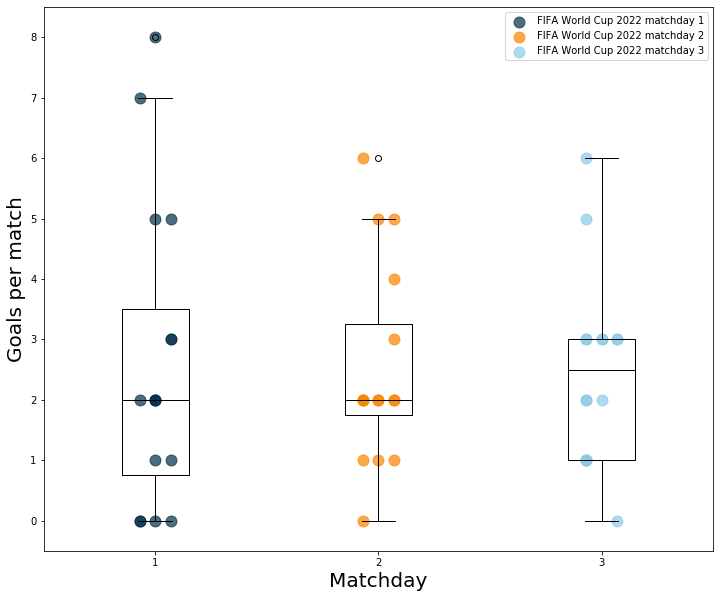

Avg goals in Matchday 1: 2.56
Avg goals in Matchday 2: 2.50
Avg goals in Matchday 3: 2.44
12


/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

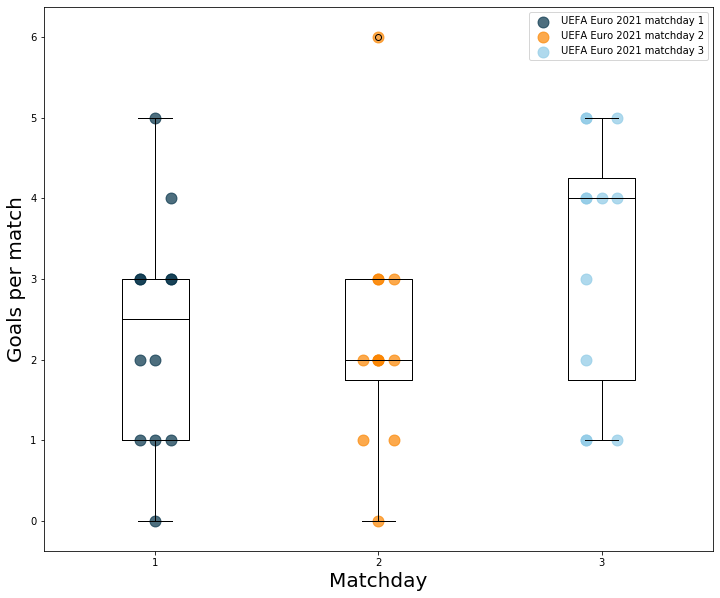

Avg goals in Matchday 1: 2.33
Avg goals in Matchday 2: 2.25
Avg goals in Matchday 3: 3.25
16


/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

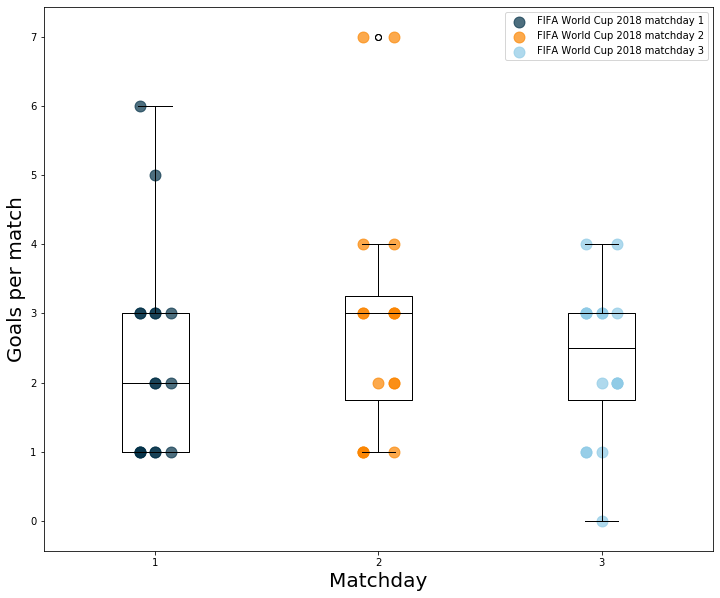

Avg goals in Matchday 1: 2.38
Avg goals in Matchday 2: 2.94
Avg goals in Matchday 3: 2.31
12


/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tropianhs/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

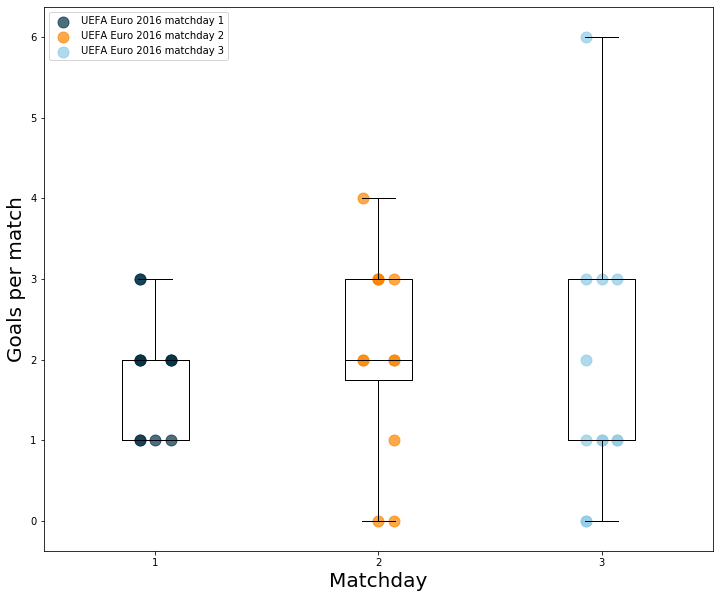

Avg goals in Matchday 1: 1.83
Avg goals in Matchday 2: 2.08
Avg goals in Matchday 3: 1.83


In [85]:
plot_goals(df_wc_22)
plot_goals(df_eu_20)
plot_goals(df_wc_18)
plot_goals(df_eu_16)
